In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
coordinates = pd.read_excel("SolarCoordinates.xlsx")
coordinates.head()

,site_id,site_name,Vendor,Latitude,Longitude
0,1001,NYC001,Dasmas,6.744280,5.16369
1,1002,NYC002,PropellerX,7.149261,6.18413
2,1003,NYC003,PropellerX,7.405310,6.24406
3,1004,NYC004,Sinon,6.870100,5.94948
4,1005,NYC005,Dasmas,6.087950,6.00175


In [59]:
coordinates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   site_id            20 non-null     int64  
 1   site_name          20 non-null     object 
 2   State              20 non-null     object 
 3   Vendor             20 non-null     object 
 4   Team lead's name   20 non-null     object 
 5   Site address       20 non-null     object 
 6   Latitude           20 non-null     float64
 7   Longitude          20 non-null     float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.4+ KB


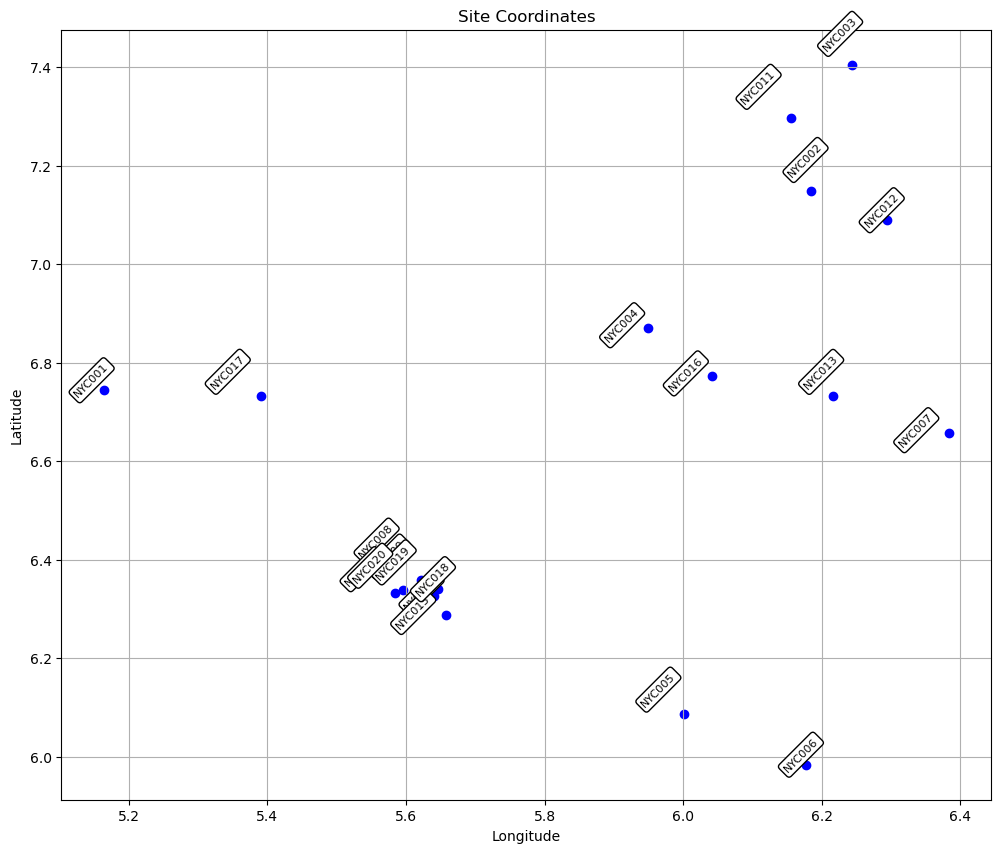

In [60]:
# Create a scatter plot of the coordinates
plt.figure(figsize=(12, 10))
plt.scatter(coordinates["Longitude"], coordinates["Latitude"], c="blue", marker="o")

# Add labels and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Site Coordinates")

# Add annotations for each site with offset positions and avoid overlap
for i, row in coordinates.iterrows():
    x_offset = np.random.choice([-10, -5, 5, 10])
    y_offset = np.random.choice([-10, -5, 5, 10])
    plt.annotate(row["site_name"], 
                 (row["Longitude"], row["Latitude"]), 
                 textcoords="offset points", 
                 xytext=(x_offset, y_offset), 
                 ha="right", 
                 rotation=45, 
                 fontsize=8,
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# Show the plot
plt.grid(True)
plt.show()

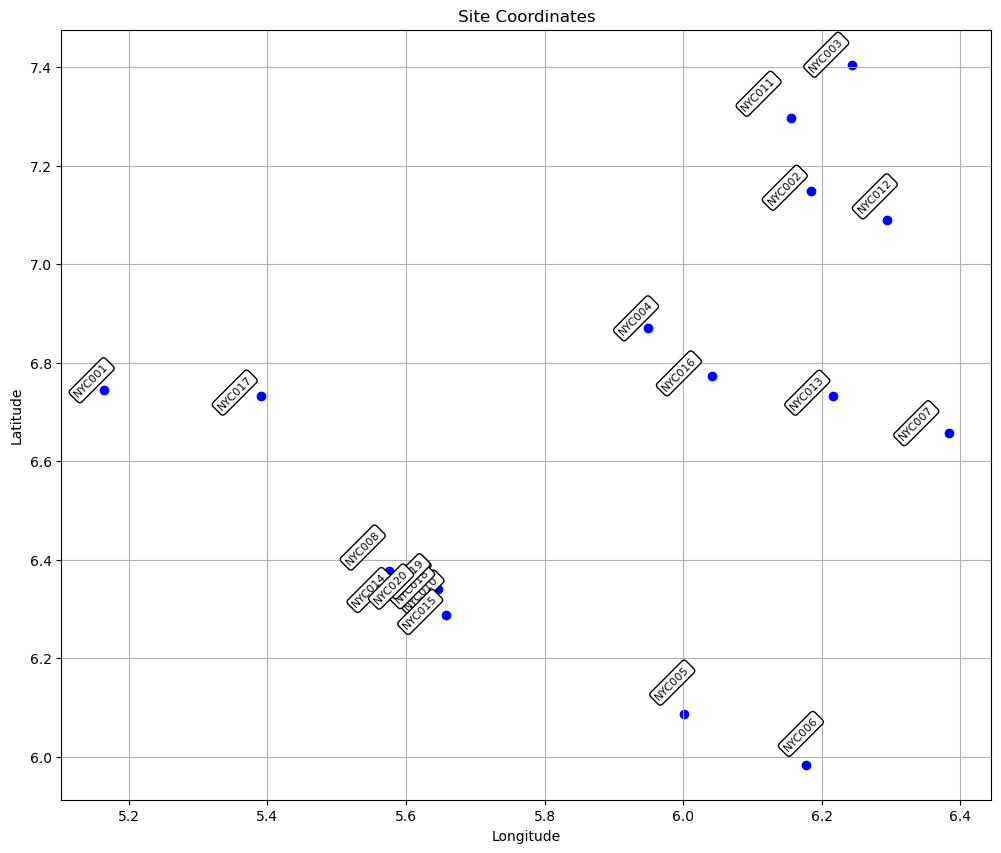

In [61]:
# Save the plot as a PNG file with the same adjustments
plt.figure(figsize=(12, 10))
plt.scatter(coordinates["Longitude"], coordinates["Latitude"], c="blue", marker="o")

# Add labels and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Site Coordinates")

# Add annotations for each site with offset positions and avoid overlap
for i, row in coordinates.iterrows():
    x_offset = np.random.choice([-10, -5, 5, 10])
    y_offset = np.random.choice([-10, -5, 5, 10])
    plt.annotate(row["site_name"], 
                 (row["Longitude"], row["Latitude"]), 
                 textcoords="offset points", 
                 xytext=(x_offset, y_offset), 
                 ha="right", 
                 rotation=45, 
                 fontsize=8,
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# Save the plot
plt.grid(True)
plt.savefig("site_coordinates.png")
plt.show()

In [66]:
# Function to allocate vendors based on site names
def allocate_vendor(site_name):
    if site_name in ["NYC001", "NYC005", "NYC006", "NYC008", "NYC014", "NYC015", "NYC017", "NYC020"]:
        return "Dasmas"
    elif site_name in ["NYC009", "NYC010", "NYC018", "NYC019"]:
        return "XAZ"
    elif site_name in ["NYC004", "NYC007", "NYC013", "NYC016"]:
        return "Sinon"
    elif site_name in ["NYC002", "NYC003", "NYC011", "NYC012"]:
        return "PropellerX"
    else:
        return 'Other'

# Apply the function to create a new column 'vendor_allocation'
coordinates["vendor_allocation"] = coordinates["site_name"].apply(allocate_vendor)

# Display the updated DataFrame
coordinates[["site_name", "State", "Longitude", "Latitude", "vendor_allocation"]]

# Save the updated DataFrame to an Excel file
with pd.ExcelWriter("20 sites Allocation.xlsx") as excel_file:
    coordinates.to_excel(excel_file, sheet_name="site_allocation", index=False, columns=["site_name", "Longitude", "Latitude", "vendor_allocation"])